## Setup

In [1]:
import torchvision.transforms as tfs
from src.models.utils import download_checkpoint, load_model
from src.experiments import *
from src.experiments.utils import *
from src.visualization import *
from src.optimization import *
from IPython.display import Image 
from PIL import Image

checkpoint_path = download_checkpoint("https://drive.google.com/file/d/19m_SaRNEF7JXHjeyNu26AxgaEQXqpI00", "protopnet.pt")
model = load_model('protopnet', checkpoint_path, device="cuda")
img_size = 224

fatal: destination path 'ProtoPNet' already exists and is not an empty directory.


# Draw "real" prototypes

In [2]:
# crop all training images from given class using bounding boxes and save to data/train_cropped/
crop_images("189.Red_bellied_Woodpecker") 

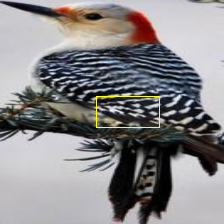

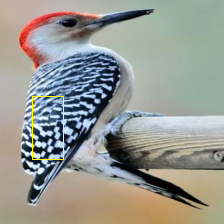

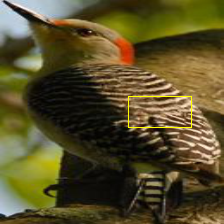

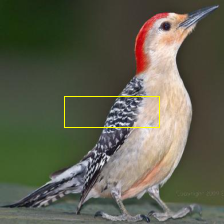

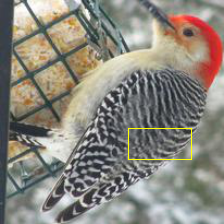

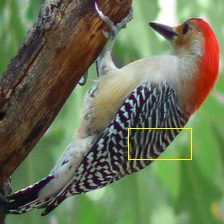

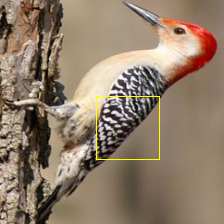

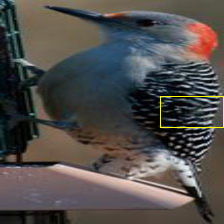

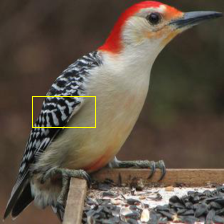

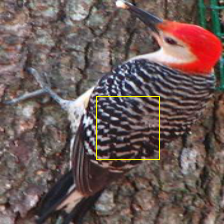

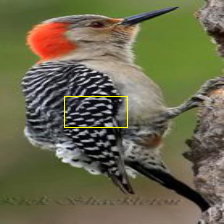

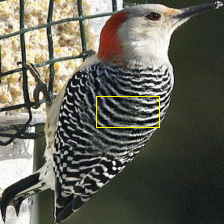

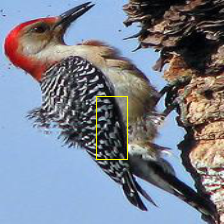

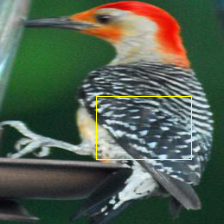

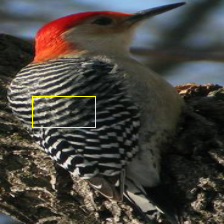

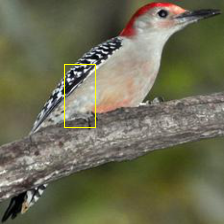

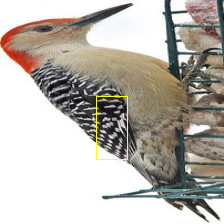

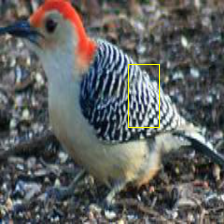

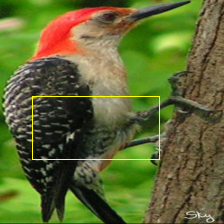

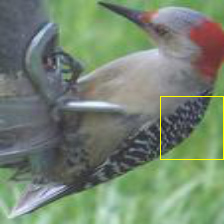

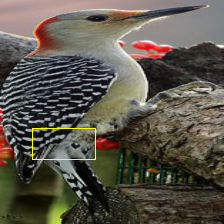

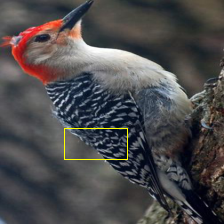

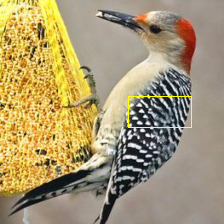

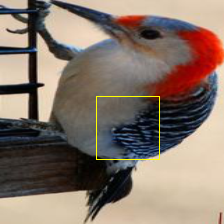

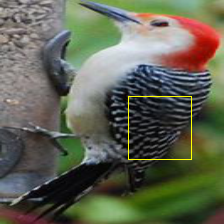

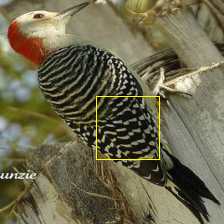

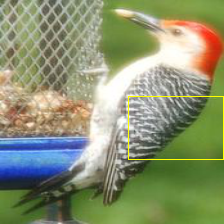

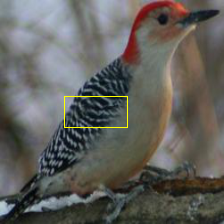

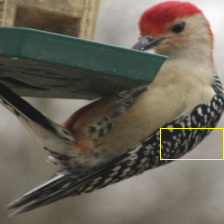

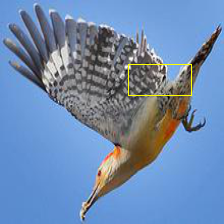

In [3]:
# Visualize given prototype for given class using all training images
directory = "data/train_cropped/189.Red_bellied_Woodpecker"
for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".jpg"):
            name = "189.Red_bellied_Woodpecker/" + filename
            img = visualize_real_prototype(model, name, 188, 0)
            display(img)

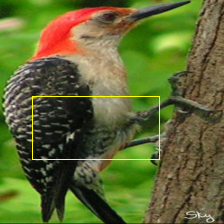

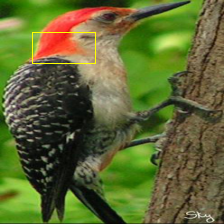

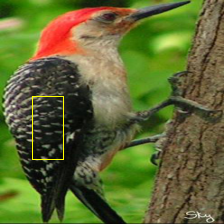

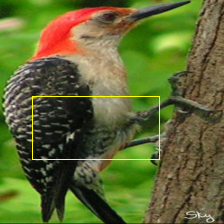

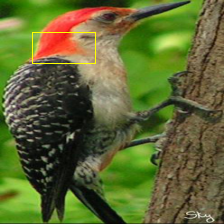

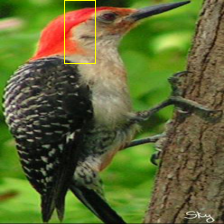

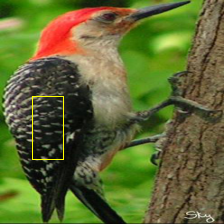

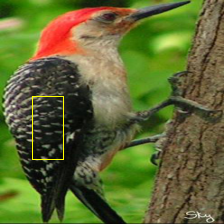

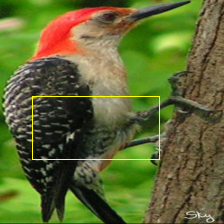

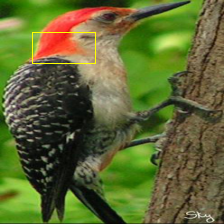

In [4]:
# Visualize all prototypes for given class using one training image
for i in range(10):
    img = visualize_real_prototype(model, "189.Red_bellied_Woodpecker/Red_Bellied_Woodpecker_0002_180879.jpg", 188, i)
    display(img)

# Experiment 1
Vizualize prototype from starting from red square.

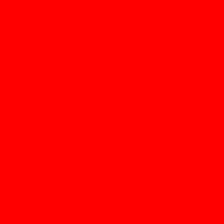

step: 0/100, loss: -0.13237014412879944


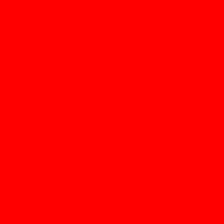

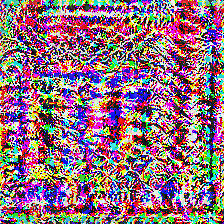

In [5]:
ptypes = [(188,1)]

size = (3, 224, 224)
input_tensor = torch.zeros(size).float()
input_tensor[0, :] = 1.0
display(tfs.ToPILImage()(input_tensor))

image = visualize_prototypes(model, ptypes, optimization_steps=100, input_tensor=input_tensor)

pilimg = tfs.ToPILImage()(image)
display(pilimg)

# Experiment 2
Vizualize prototype starting from the bird image (cropped and resized).

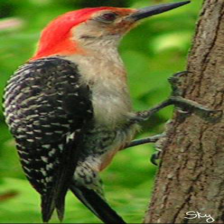

step: 0/100, loss: -0.2376064509153366


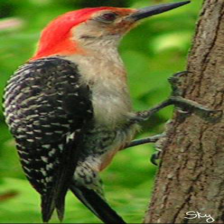

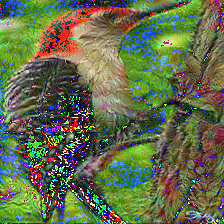

In [6]:
ptypes = [(188,1)]

transform = tfs.Compose([
    tfs.Resize(size=(img_size, img_size)),
    tfs.ToTensor()])
input_image = Image.open("data/train_cropped/189.Red_bellied_Woodpecker/Red_Bellied_Woodpecker_0002_180879.jpg")
input_tensor = transform(input_image)
display(tfs.ToPILImage()(input_tensor))

image = visualize_prototypes(model, ptypes, optimization_steps=100, input_tensor=input_tensor)
pilimg = tfs.ToPILImage()(image)
display(pilimg)

# Experiment 3
Vizualize prototype starting from the bird image (cropped, resized and normalized).

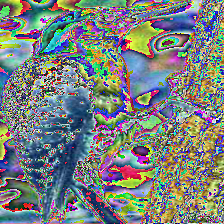

step: 0/100, loss: -0.2905891239643097


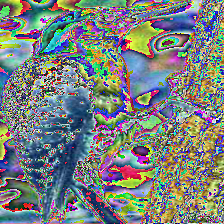

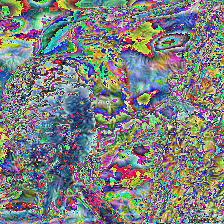

In [7]:
ptypes = [(188,1)]

mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
normalize = tfs.Normalize(mean, std)
transform = tfs.Compose([
    tfs.Resize(size=(img_size, img_size)),
    tfs.ToTensor(),
    normalize])
input_image = Image.open("data/train_cropped/189.Red_bellied_Woodpecker/Red_Bellied_Woodpecker_0002_180879.jpg")
input_tensor = transform(input_image)
display(tfs.ToPILImage()(input_tensor))

image = visualize_prototypes(model, ptypes, optimization_steps=100, input_tensor=input_tensor)
pilimg = tfs.ToPILImage()(image)
display(pilimg)

# Experiment 4

Clamp and blur before every optimizer step.

step: 0/500, loss: -0.09256522357463837


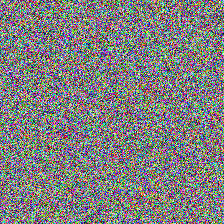

step: 100/500, loss: -1.3450928926467896
step: 200/500, loss: -2.1276488304138184
step: 300/500, loss: -1.4992233514785767
step: 400/500, loss: -2.0757856369018555


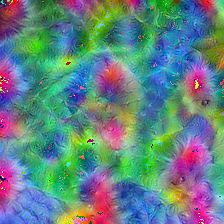

In [8]:
ptypes = [(188,1)]

def before_optim_step(t):
    tt = torch.clamp(t, 0, 1)
    t.data = tfs.GaussianBlur(7, 2)(tt).data

size = (3, 224, 224)
input_tensor = torch.randn(size)

image = visualize_prototypes(model, ptypes, optimization_steps=500, input_tensor=input_tensor,
                             before_optim_step=before_optim_step, optimizer_kwargs={'lr': 0.2})

pilimg = tfs.ToPILImage()(image)
display(pilimg)

## Optimized prototypes vs real prototypes

In [9]:
# draw_optimized_prototypes_vs_real_prototypes(model)

## Optimized prototypes vs real prototypes - distance histogram

In [10]:
# draw_distance_histogram(model)